- Context : 
      For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive veiw of the state of  data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what's happening at the cutting edge of machine learning across industries and how new data scientists can best break into the fields


- Content:
        The data includes 5 files:
        
        schema.csv: a CSV file with survey schema. This schema includes the questions that correspond to each 
        column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
        
        multipleChoiceResponses.csv: Respondents' answers to multiple choice and ranking questions. 
        These are non-randomized and thus a single row does correspond to all of a single user's answers.
            
        freeformResponses.csv: Respondents' freeform answers to Kaggle's survey questions. These 
        responses are randomized within a column, so that reading across a single row does not give a 
        single user's answers.
            
        conversionRates.csv: Currency conversion rates (to USD) as accessed from the R package "quantmod"
        on September 14, 2017
            
        RespondentTypeREADME.txt: This is a schema for decoding the responses in the "Asked" column of 
        the schema.csv file.

## 1. Library

In [1]:
# import the standard python scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# To draw a graph in a notebook
%matplotlib inline

# Suppress deprecation and incorrect usage warnings
import warnings
warnings.filterwarnings('ignore')


## 2. Import

In [2]:
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [3]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [4]:
# Bring the responds to multiple-choice multiple
mcq = pd.read_csv('multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

## 3. Exploring the Data

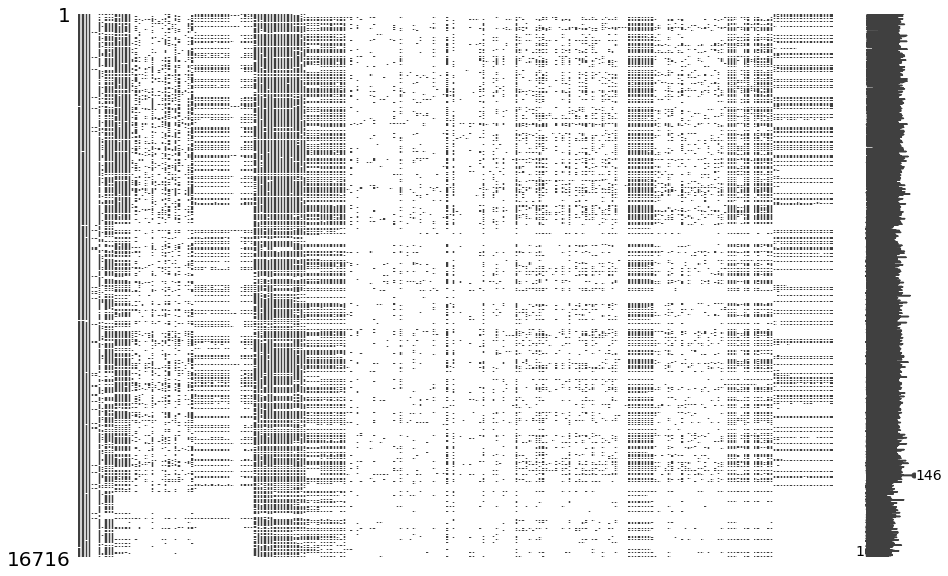

In [7]:
# missingno visualizes NaN data
# Since there are many columns of NaN data, it is difficult to grasp the contents with the graph below.

import missingno as msno
msno.matrix(mcq, figsize=(15,10))

Note: 
It answers 16,716 data, 228 multiple-choice questions, and 62 questions. (Total 290 questions) Many unanswered questions

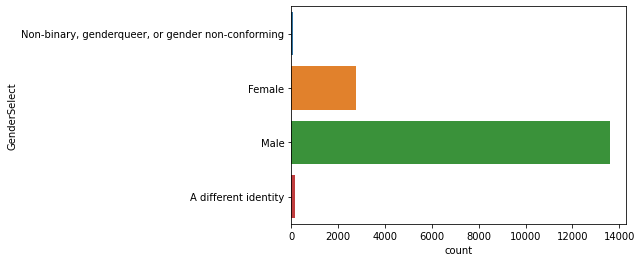

In [9]:
# Gender
sns.countplot(y='GenderSelect', data=mcq)

Note: The proportion of men is much higher than that of women


In [22]:
# Number of responses by country
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가']=con_df.index
con_df.columns = ['Num_of_Response', 'Country']
con_df = con_df.reset_index().drop('index', axis=1)

con_df.head(10)

,Num_of_Response,Country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [25]:
# View information about age.

mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

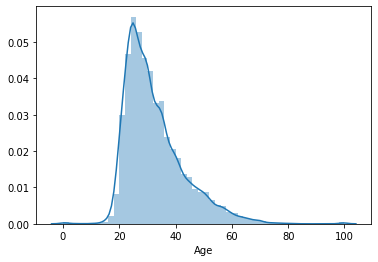

In [26]:
sns.distplot(mcq['Age'])

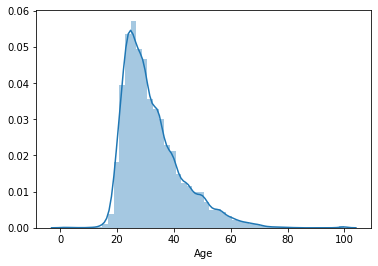

In [28]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

Note: 
Most of the respondents are young,
It is rapidly increasing from the 20s, and the most in the 30s.
The average age is 32.

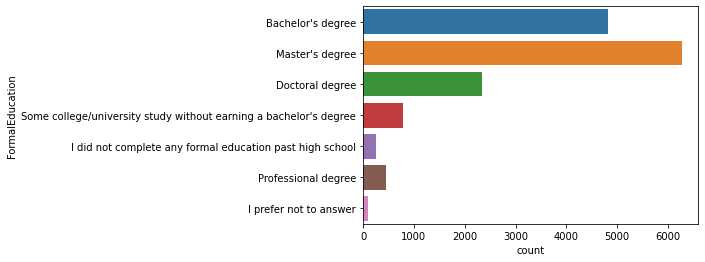

In [29]:
# Education
sns.countplot(y='FormalEducation', data=mcq)

Note : 
More people have a master's degree than people with a bachelor's degree, and many people have a doctorate.

In [36]:
# Major

mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True )
mcq_major_df.columns = ['num_of_response', 'proportion']
mcq_major_df.head()

,num_of_response,proportion
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851


Note: 
Computer majors are the largest with 33%, followed by mathematics, engineering, and electrical engineering.

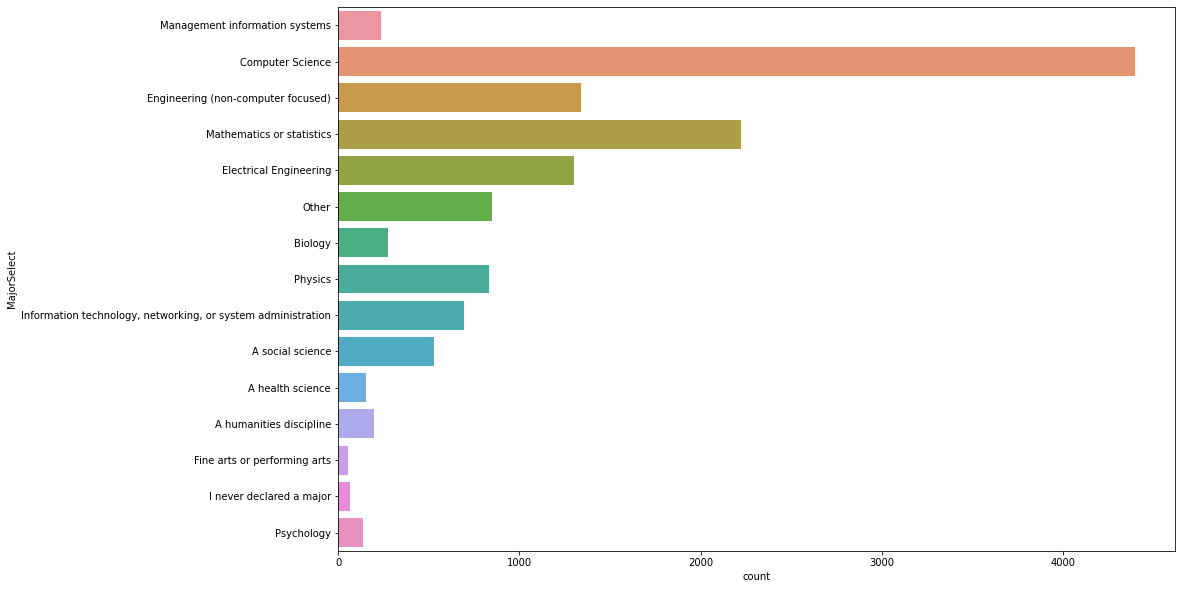

In [37]:
# Current status of majors in school
plt.figure(figsize=(15,10))
sns.countplot(y='MajorSelect', data=mcq)

In [42]:
# Work status
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns= ['num_of_response', 'proportion']
mcq_es_df.head()

,num_of_response,proportion
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858


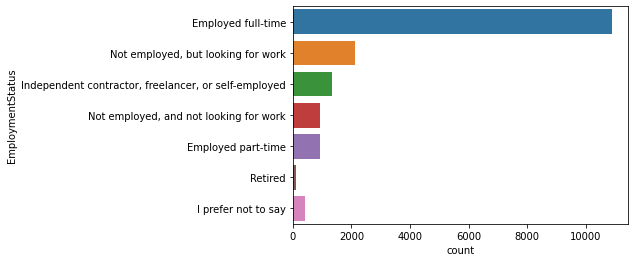

In [44]:
sns.countplot(y='EmploymentStatus', data=mcq)

Note: 
65% of respondents work full-time, followed by job seekers 12%

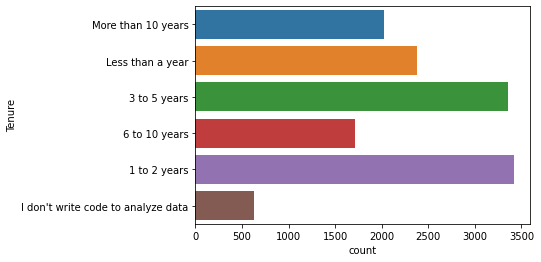

In [45]:
# Programing Experience
sns.countplot(y='Tenure', data=mcq)

Note: Tenure is a question of how much coding experience you have in data science. Most of them are less than 5 years, especially many people with 1 ~ 2 years of experience.

In [46]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
korea.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important


In [47]:
print('The number of interviewees in Korea: ' + str(korea.shape[0]))

The number of interviewees in Korea: 194


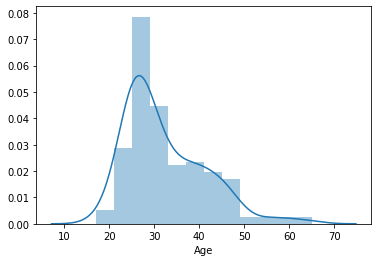

In [48]:
sns.distplot(korea['Age'])

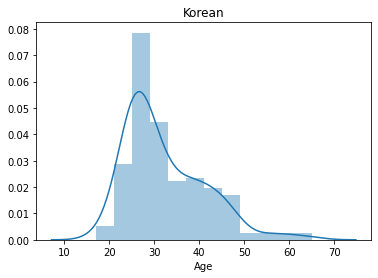

In [51]:
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [52]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

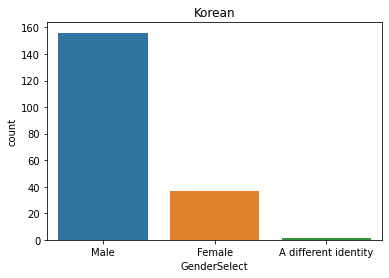

In [53]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

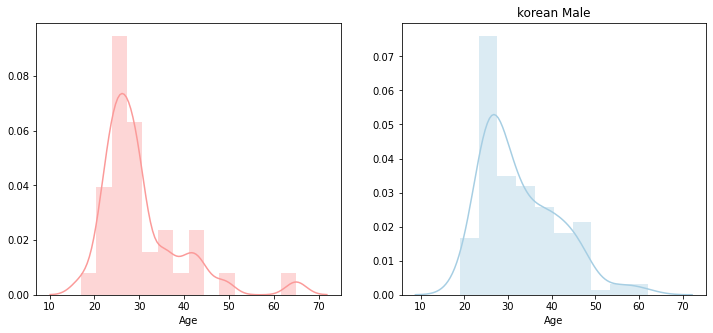

In [63]:
figure, (ax1, ax2) =  plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4],ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0],ax=ax2)
plt.title('korean Male')




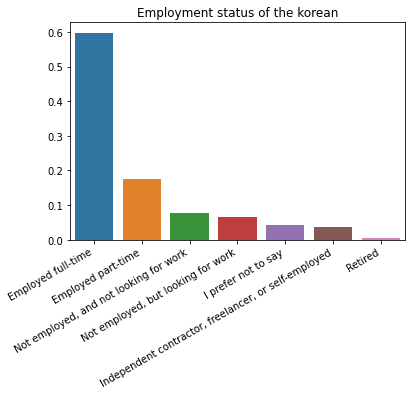

In [68]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

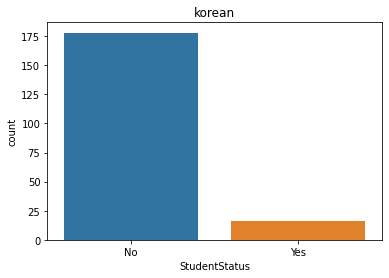

In [74]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [77]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
